In [1]:
import pandas as pd
import numpy as np

In [2]:
final = pd.read_csv('data/final.csv')
final.head()

,duration,evidence,Program Subclass_Arterial Widening,Program Subclass_Bike Lane,Program Subclass_Bridge Construction,Program Subclass_Bus Pad Construction,Program Subclass_Crack Sealing,Program Subclass_Drainage Improvements,Program Subclass_Electric,Program Subclass_Electrical,...,centroid_10,centroid_11,centroid_2,centroid_3,centroid_4,centroid_5,centroid_6,centroid_7,centroid_8,centroid_9
0,0.225715,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.225715,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.225715,0.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.225715,0.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.225715,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [3]:
final.columns

Index(['duration', 'evidence', 'Program Subclass_Arterial Widening',
       'Program Subclass_Bike Lane', 'Program Subclass_Bridge Construction',
       'Program Subclass_Bus Pad Construction',
       'Program Subclass_Crack Sealing',
       'Program Subclass_Drainage Improvements', 'Program Subclass_Electric',
       'Program Subclass_Electrical', 'Program Subclass_Existing Parks',
       'Program Subclass_Facilities', 'Program Subclass_Gas',
       'Program Subclass_Intersection Improvements',
       'Program Subclass_Joint Reconstruction',
       'Program Subclass_Local Repair / Preventative Maintenance',
       'Program Subclass_Microsurfacing', 'Program Subclass_Mill and Pave',
       'Program Subclass_Miscellaneous', 'Program Subclass_Multi-use Pathway',
       'Program Subclass_New Parks', 'Program Subclass_New Road Construction',
       'Program Subclass_New Traffic Signal',
       'Program Subclass_New Traffic Signal/Intersection Improvements',
       'Program Subclass_Pathway

In [4]:
X = final.drop('evidence', axis=1)
y = final['evidence']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
from sklearn import svm

In [9]:
from sklearn.model_selection import RandomizedSearchCV

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [11]:
import seaborn as sns

In [12]:
param_dict = {'penalty': ['l2'],
              'tol': [0.0001, 0.005, 0.00001],
              'C': [1],
              'class_weight': ['balanced', None],
              'solver': ['liblinear', 'newton-cg', 'lbfgs', 'saga'],
              'max_iter': [100, 200],
              'n_jobs': [-1]
}

In [13]:
lr = LogisticRegression()
lr_cv = RandomizedSearchCV(lr, param_dict, n_jobs=-1)
lr_cv.fit(X_train, y_train)

RandomizedSearchCV(estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [1],
                                        'class_weight': ['balanced', None],
                                        'max_iter': [100, 200], 'n_jobs': [-1],
                                        'penalty': ['l2'],
                                        'solver': ['liblinear', 'newton-cg',
                                                   'lbfgs', 'saga'],
                                        'tol': [0.0001, 0.005, 1e-05]})

In [14]:
lr_cv.score(X_test, y_test)

0.6835443037974683

In [15]:
y_pred = lr_cv.predict(X_test)

In [16]:
precision_score(y_test, y_pred)

0.3333333333333333

In [17]:
recall_score(y_test, y_pred)

0.041666666666666664

In [18]:
f1_score(y_test, y_pred)

0.07407407407407407

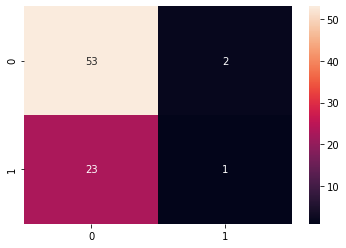

In [19]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [20]:
param_dict = {'tol': [0.0001, 0.00001],
              'C': [1],
              'class_weight': ['balanced', None],
              'kernel': ['linear', 'poly', 'rbf']
}

In [21]:
clf = svm.SVC()
clf_cv = RandomizedSearchCV(clf, param_dict, n_jobs=-1)
clf_cv.fit(X_train, y_train)

RandomizedSearchCV(estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [1],
                                        'class_weight': ['balanced', None],
                                        'kernel': ['linear', 'poly', 'rbf'],
                                        'tol': [0.0001, 1e-05]})

In [22]:
clf_cv.score(X_test, y_test)

0.6962025316455697

In [23]:
y_pred = clf_cv.predict(X_test)

In [24]:
precision_score(y_test, y_pred)

0.5

In [25]:
recall_score(y_test, y_pred)

0.125

In [26]:
f1_score(y_test, y_pred)

0.2

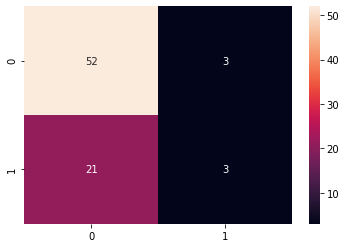

In [27]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [28]:
import pickle

In [29]:
pickle.dump(lr_cv, open('models/logreg.pkl', 'wb'))
pickle.dump(clf_cv, open('models/svm.pkl', 'wb'))